# Crime Statistics in Los Angeles

## Introduction

![Los Angeles skyline](./images/la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World!

Known for its pleasant climate 🌞, palm trees 🌴, expansive coastline 🏖️, and Hollywood ⭐, Los Angeles has also produced some of the most iconic films and music. However, as with any densely populated city, it is not without its challenges, and crime rates can be considerable 🚨. Crime is a prominent issue that requires attention and strategic action.

The Los Angeles Police Department (LAPD) 👮‍♂️ is focusing on the analysis of crime data to identify patterns in criminal behaviour. The insights from this analysis will be crucial for optimising the allocation of resources across various districts to effectively address crime.



## Setting up the Environment

In this environment, several essential packages are imported to support the data analysis workflow:

- **pandas** and **numpy** are used for data manipulation and numerical operations.
- **matplotlib** and **seaborn** are used for data visualisation, enabling the creation of various plots.
- **os** is for interacting with the operating system, such as working with file paths.
- **la_crime** is a custom package used for handling crime-related datasets and analysis.

To ensure the custom package `la_crime` is correctly installed in editable mode, run the following command in a Terminal:

```pip install -e .```

This will install the package in editable mode, allowing you to make changes to the code without needing to reinstall the package.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import la_crime
from la_crime.config import RAW_DATA_DIR, INTERIM_DATA_DIR, CLEANED_DATA_DIR
import la_crime.custom_funcs as cf

## The Data

### `'crimes.csv'`

A dataset has been provided ('./d0-raw/crimes.csv') for the analysis. Below is a summary and preview.

This dataset is a modified version of the original data, which is publicly available from [Los Angeles Open Data](https://data.lacity.org/).

| Column      | Description                                                                                       |
|-------------|---------------------------------------------------------------------------------------------------|
| `'DR_NO'`   | Division of Records Number: The official file number, composed of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY.                                                                       |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY.                                                                  |
| `'TIME OCC'` | Time of occurrence in 24-hour military format.                                                    |
| `'AREA NAME'` | The 21 geographic areas or patrol divisions are each given a name that references a landmark or the surrounding community they serve. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighbourhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Description of the crime committed.                                                              |
| `'Vict Age'` | The age of the victim in years.                                                                   |
| `'Vict Sex'` | The sex of the victim: `F`: Female, `M`: Male, `X`: Unknown.                                       |
| `'Vict Descent'` | The descent of the victim, with options as follows:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latino/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li></ul> |
| `'Weapon Desc'` | A description of the weapon used, if applicable.                                                  |
| `'Status Desc'` | The status of the crime.                                                                          |
| `'LOCATION'` | The street address where the crime occurred.                                                      |

In [2]:
csv_file = os.path.join(RAW_DATA_DIR, 'crimes.csv')
crimes = pd.read_csv(csv_file, parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [3]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


### `'API'`

Similar to the process of importing the data from the `csv` file, the data directly from the Los Angeles Open Data `API` was used. [Los Angeles Crime Data API](https://dev.socrata.com/foundry/data.lacity.org/63jg-8b9z).

This dataset is a subset of the original Los Angeles Open Data, which contains over 2.5 million entries. The dataset used here is a 200,000-record sample from the original database. It is recommended to use the provided CSV for more comprehensive analysis.
    
> **NOTE: The code for this section has been deactivated in order to avoid losing resources.**                                            

| Column          | Description                                                                                         |
|-----------------|-----------------------------------------------------------------------------------------------------|
| `'dr_no'`       | Division of Records Number: The official file number, composed of a 2-digit year, area ID, and 5 digits. |
| `'date_rptd'`   | Date reported - MM/DD/YYYY.                                                                         |
| `'date_occ'`    | Date of occurrence - MM/DD/YYYY.                                                                    |
| `'time_occ'`    | Time of occurrence in 24-hour military format.                                                      |
| `'area_name'`   | The 21 geographic areas or patrol divisions are each given a name referencing a landmark or the surrounding community they serve. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighbourhoods in South Los Angeles. |
| `'crm_cd_desc'` | Description of the crime committed.                                                                  |
| `'vict_age'`    | The age of the victim in years.                                                                     |
| `'vict_sex'`    | The sex of the victim: `F`: Female, `M`: Male, `X`: Unknown.                                         |
| `'vict_descent'`| The descent of the victim, with options as follows:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latino/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li></ul> |
| `'weapon_desc'` | A description of the weapon used, if applicable.                                                    |
| `'status_desc'` | The status of the crime.                                                                            |
| `'location'`    | The street address where the crime occurred.                                                        |
| `'lat'`         | Latitude                                                                                           |
| `'lon'`         | Longitude                                                                                          |


### Using `'CSV'` or `'API'`

Select one of the two datasets: `crimes` for the CSV file or `crimes_api` for the data fetched from the API, depending on the chosen resources.

In [4]:
# Copy the 'crimes' dataset (CSV data) into the DataFrame
df = crimes.copy() 

# Alternatively, if using the API data, copy 'crimes_api' into the DataFrame
# df = crimes_api.copy() 

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


### Numeric values

In the raw data there are only **four** numeric values, **Two** integers and **two* datetime.

In [6]:
df.describe()

,DR_NO,Date Rptd,DATE OCC,Vict Age
count,1.857150e+05,185715,185715,185715.000000
mean,2.255781e+08,2022-12-12 01:50:25.325902848,2022-11-27 19:04:55.711170560,39.999257
min,2.009072e+08,2022-06-01 00:00:00,2020-01-01 00:00:00,2.000000
25%,2.210108e+08,2022-09-04 00:00:00,2022-08-25 00:00:00,28.000000
50%,2.220114e+08,2022-12-10 00:00:00,2022-12-02 00:00:00,37.000000
75%,2.310044e+08,2023-03-20 00:00:00,2023-03-12 00:00:00,50.000000
max,2.399097e+08,2023-07-03 00:00:00,2023-07-03 00:00:00,99.000000
std,5.017438e+06,NaN,NaN,15.450227


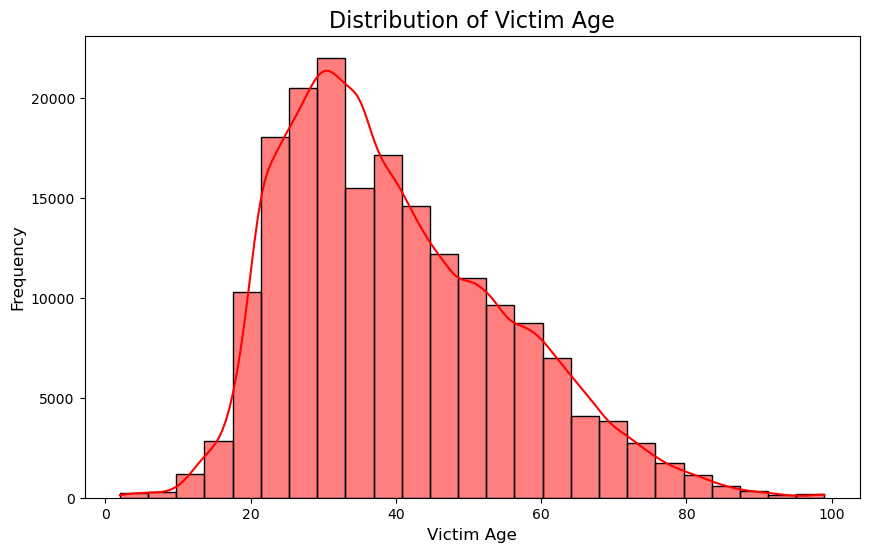

In [7]:
# Plot the distribution of 'Vict Age'
plt.figure(figsize=(10, 6))

# Histogram with Seaborn
sns.histplot(df['Vict Age'], kde=True, bins=25, color='red')

# Adding titles and labels
plt.title('Distribution of Victim Age', fontsize=16)
plt.xlabel('Victim Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.savefig('./figures/f1_vict_age.png')
plt.show()


Next, let us create a new column named `'victim_ages'` to categorise the victim ages into predefined bins.

In [8]:
# Define age bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
age_labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

# Create a new column 'Age Category' by categorizing 'Vict Age'
df['victim_ages'] = pd.cut(df['Vict Age'], bins=age_bins, labels=age_labels, right=True)

# Convert 'Age Category' to ordered categorical type
age_order = pd.CategoricalDtype(categories=age_labels, ordered=True)
df['victim_ages'] = df['victim_ages'].astype(age_order)

# Display the first few rows to verify the results
print(df[['Vict Age', 'victim_ages']].head())


   Vict Age victim_ages
0        27       26-34
1        60       55-64
2        28       26-34
3        37       35-44
4        79         65+


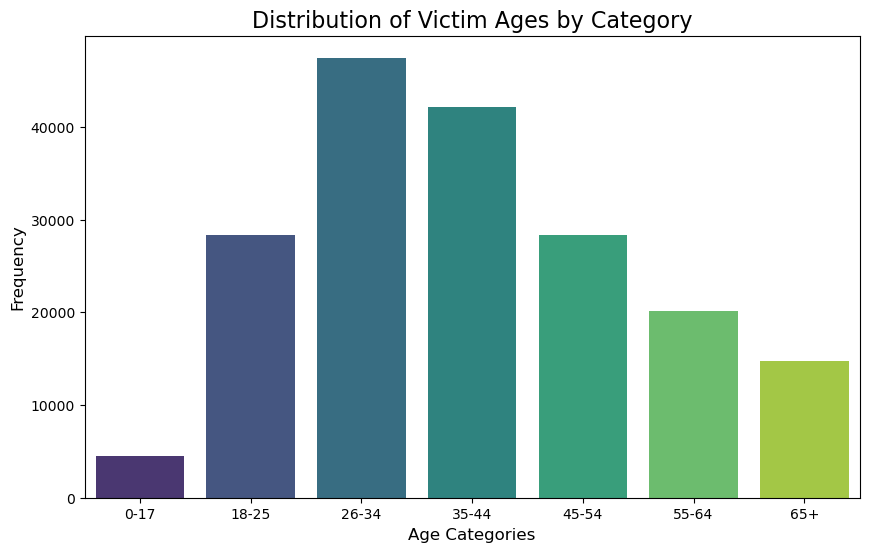

In [9]:
# Plot the distribution of the 'victim_ages' bins
plt.figure(figsize=(10, 6))

# Countplot to show the distribution of the 'victim_ages' categories
sns.countplot(data=df, x='victim_ages', 
              hue='victim_ages', 
              palette='viridis', 
              #legend=False
             )

# Adding titles and labels
plt.title('Distribution of Victim Ages by Category', fontsize=16)
plt.xlabel('Age Categories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.savefig('./figures/f2_vict_age_cat.png')
plt.show()


### Categorical values

#### 'DR_NO'

The `'DR_NO'` serves as an index and does not represent a numeric value.

In [10]:
# 'DR_NO' type is changed to string.
df['DR_NO']=df['DR_NO'].astype('str') 

In [11]:
df.describe(include=['category','object'])

,DR_NO,TIME OCC,AREA NAME,Crm Cd Desc,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,victim_ages
count,185715,185715,185715,185715,185704,185705,73502,185715,185715,185715
unique,185715,1439,21,104,4,20,74,6,39286,7
top,230906458,1200,Central,THEFT OF IDENTITY,M,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,600 S BROADWAY,26-34
freq,1,6462,14944,22670,93008,74128,39889,153790,358,47470


In [12]:
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H%M')

#### 'AREA NAME'

The `'AREA NAME'` column contains 21 unique values. These values will be sorted and analysed to identify any discrepancies or duplicates.

In [13]:
sorted(df['AREA NAME'].unique())

['77th Street',
 'Central',
 'Devonshire',
 'Foothill',
 'Harbor',
 'Hollenbeck',
 'Hollywood',
 'Mission',
 'N Hollywood',
 'Newton',
 'Northeast',
 'Olympic',
 'Pacific',
 'Rampart',
 'Southeast',
 'Southwest',
 'Topanga',
 'Van Nuys',
 'West LA',
 'West Valley',
 'Wilshire']

#### 'Crm Cd Desc'

The `'Crm Cd Desc'` column contains 104 unique values. These values will be sorted and analysed to identify any discrepancies or duplicates.

In [14]:
sorted(df['Crm Cd Desc'].unique())

['ARSON',
 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 'ATTEMPTED ROBBERY',
 'BATTERY - SIMPLE ASSAULT',
 'BATTERY ON A FIREFIGHTER',
 'BATTERY POLICE (SIMPLE)',
 'BIGAMY',
 'BIKE - STOLEN',
 'BLOCKING DOOR INDUCTION CENTER',
 'BOMB SCARE',
 'BRANDISH WEAPON',
 'BRIBERY',
 'BUNCO, ATTEMPT',
 'BUNCO, GRAND THEFT',
 'BUNCO, PETTY THEFT',
 'BURGLARY',
 'BURGLARY FROM VEHICLE',
 'BURGLARY FROM VEHICLE, ATTEMPTED',
 'BURGLARY, ATTEMPTED',
 'CONSPIRACY',
 'CONTEMPT OF COURT',
 'CONTRIBUTING',
 'COUNTERFEIT',
 'CREDIT CARDS, FRAUD USE ($950 & UNDER',
 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
 'CRIMINAL HOMICIDE',
 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
 'CRUELTY TO ANIMALS',
 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER',
 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01',
 'DISCHARGE FIREARMS/SHOTS FIRED',
 'DISHONEST EMPLOYEE - GRAND THEFT',
 'DISHONEST EM

#### 'Vict Sex'

For the column `'Vict Sex'`, there are 4 unique values, but there should only be 3.

In [15]:
df['Vict Sex'].value_counts(dropna=False)

Vict Sex
M      93008
F      89854
X       2812
H         30
NaN       11
Name: count, dtype: int64

There is a 'H' value that is not part of the listed categories. It will be recategorised as 'X' (unknown). Any NaN values will be filled with 'X'.

In [16]:
# Replace any value not in the valid categories with 'X'
df['Vict Sex'] = df['Vict Sex'].apply(lambda x: x if x in ['M', 'F', 'X'] else 'X').fillna('X').astype('category')

#### 'Vict Descent'

Similar to how the 'Vict Sex' column was handled, the 'Vict Descent' column will be categorised based on the described values. Unknown values, values outside the categories, or other invalid entries will be assigned the value 'X'.

In [17]:
df['Vict Descent'].value_counts(dropna=False)

Vict Descent
H      74128
W      44985
B      34931
O      16331
A       5519
X       4548
K       1389
F       1228
C       1210
J        433
V        327
I        322
Z        145
P         83
U         54
D         21
L         20
S         16
G         14
NaN       10
-          1
Name: count, dtype: int64

In [18]:
ethnicity_list = [
    'A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'O', 'P', 'S', 'U', 'V', 'W', 'X', 'Z'
]
# Replace any value not in the valid categories with 'X'
df['Vict Descent'] = df['Vict Descent'].apply(lambda x: x if x in ethnicity_list else 'X').fillna('X').astype('category')

#### Day Time labeling

The following time categories were defined for the dataset:

| Category        | Time Range     |
|-----------------|----------------|
| Late-night      | 00:00 - 04:00  |
| Early-morning   | 04:00 - 06:00  |
| Morning         | 06:00 - 09:00  |
| Late-morning    | 09:00 - 12:00  |
| Midday          | 12:00 - 15:00  |
| Afternoon       | 15:00 - 19:00  |
| Evening         | 19:00 - 22:00  |
| Night           | 22:00 - 24:00  |

These bins help categorise the 'hour' into meaningful time periods of the day, making it easier to analyse activities based on different times of day.

In [19]:
# Convert time to hour of the day (0-23) for density estimation
df['hour'] = df['TIME OCC'].dt.hour + df['TIME OCC'].dt.minute / 60  # Converts time to a float

# Define time bins and labels correctly
time_bins = [0.00,        4.00,            6.00,      9.00,          12.00,    15.00,    19.00,         22.00,   24.00]
time_labels = ['late-night', 'early-morning', 'morning', 'late-morning', 'midday', 'afternoon', 'evening', 'night']

# Ensure the order of categories is meaningful for sorting
time_order = pd.CategoricalDtype(categories= ['late-night', 'early-morning', 'morning', 'late-morning', 'midday', 'afternoon', 'evening', 'night'], ordered=True)

# Create a new column 'day_time' by categorizing 'hour'
df['day_time'] = pd.cut(df['hour'], bins=time_bins, labels=time_labels, right=True)

# Convert 'day_time' to ordered categorical type
df['day_time'] = df['day_time'].astype(time_order)

# Display sample results to verify
print(df[['hour', 'TIME OCC', 'day_time']].sample(5))

             hour            TIME OCC      day_time
14412    9.250000 1900-01-01 09:15:00  late-morning
95462   14.750000 1900-01-01 14:45:00        midday
116754  21.666667 1900-01-01 21:40:00       evening
23640    6.316667 1900-01-01 06:19:00       morning
116193   3.000000 1900-01-01 03:00:00    late-night


#### 'Status Desc'

Similar to how the 'Vict Sex' or 'Vict Descent' column was handled, the 'Status Desc' column will be categorised based on the values available. Unknown values, values outside the categories, or other invalid entries will be assigned the value 'Unknown'.

In [20]:
display(df['Status Desc'].value_counts(dropna=False))

Status Desc
Invest Cont     153790
Adult Other      17722
Adult Arrest     13397
Juv Arrest         492
Juv Other          312
UNK                  2
Name: count, dtype: int64

In [21]:
categories_status = ['Invest Cont', 'Adult Other', 'Adult Arrest', 'Juv Other', 'Juv Arrest']
# Replace any value not in the valid categories with 'Unknown'
df['Status Desc'] = df['Status Desc'].apply(lambda x: x if x in categories_status else 'Unknown').fillna('Unknown').astype('category')

## Comparing raw and cleaned data

In [22]:
cf.compare_info(crimes, df, df1_name="Raw Data", df2_name="Cleaned Data")

# Function to compare memory usage
cf.compare_memory_usage(crimes, df)

# Function to check missing values
print("\nMissing Values Comparison:")
print(cf.compare_missing_values(crimes, df))

# Function to compare column data types
print("\nData Type Changes:")
print(cf.compare_dtypes(crimes, df))

,Raw Data,Non-Null Count,Cleaned Data,Non-Null Count
DR_NO,int64,185715.0,object,185715
Date Rptd,datetime64[ns],185715.0,datetime64[ns],185715
DATE OCC,datetime64[ns],185715.0,datetime64[ns],185715
TIME OCC,object,185715.0,datetime64[ns],185715
AREA NAME,object,185715.0,object,185715
Crm Cd Desc,object,185715.0,object,185715
Vict Age,int64,185715.0,int64,185715
Vict Sex,object,185704.0,category,185715
Vict Descent,object,185705.0,category,185715
Weapon Desc,object,73502.0,object,73502



Memory Usage (MB):
Raw Data: 96.18 MB
Cleaned Data: 69.80 MB

Missing Values Comparison:
              Raw Data  Cleaned Data
Vict Descent      10.0             0
Vict Sex          11.0             0
Weapon Desc   112213.0        112213

Data Type Changes:
             Raw Data    Cleaned Data
DR_NO           int64          object
Status Desc    object        category
TIME OCC       object  datetime64[ns]
Vict Descent   object        category
Vict Sex       object        category
day_time          NaN        category
hour              NaN         float64
victim_ages       NaN        category


## Save cleaned data in a CSV file

In [23]:
cleaned_file = os.path.join(CLEANED_DATA_DIR, 'crimes_cleaned.csv')
df.to_csv(cleaned_file)

## Exploratory Data Analysis

### Plotting the Density of Crime Occurrences Over Time

This analysis aims to explore the distribution of crime occurrences throughout the day. By visualising the density of crimes at each hour, we can gain insights into potential patterns and peak times of criminal activity. The resulting plot will highlight the times of day when crimes are most frequent, helping to inform strategies for crime prevention and resource allocation. The x-axis represents the hours of the day, while the y-axis shows the occurrences, with a clear indication of trends across the 24-hour period.



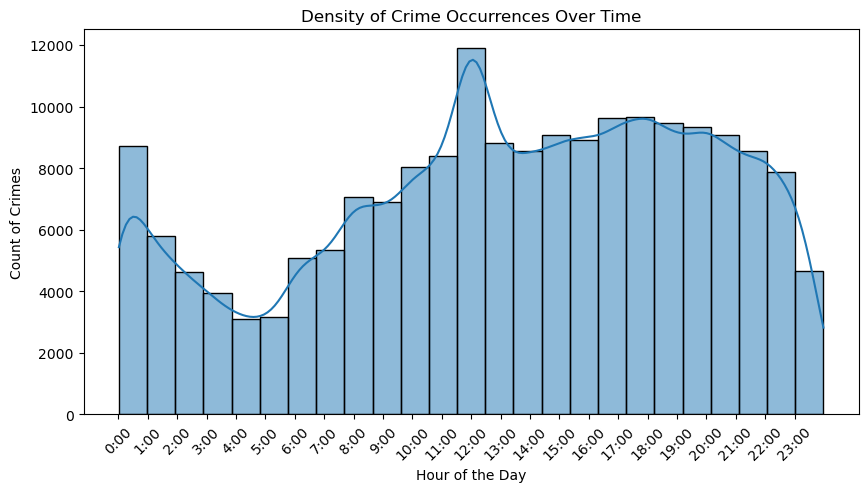

In [24]:
# Plot Density using KDE
plt.figure(figsize=(10, 5))
sns.histplot(df['hour'], bins=25,kde=True)

# Formatting
plt.title("Density of Crime Occurrences Over Time")
plt.xlabel("Hour of the Day")
plt.ylabel("Count of Crimes")
plt.xticks(range(0, 24), labels=[f"{h}:00" for h in range(24)], rotation=45)
plt.savefig('./figures/f3_crimes_over_time.png')
plt.show()


### Crime Occurrence Density by Time of Day

This analysis reveals the distribution of criminal activity across different times of the day. By categorising crimes into time-of-day intervals, it highlights when criminal occurrences are most prevalent. The plot provides a clear indication of peak periods, helping to identify whether certain times, such as early morning or late evening, see higher rates of crime. Understanding these trends is essential for allocating resources effectively and addressing crime prevention at specific times of day.



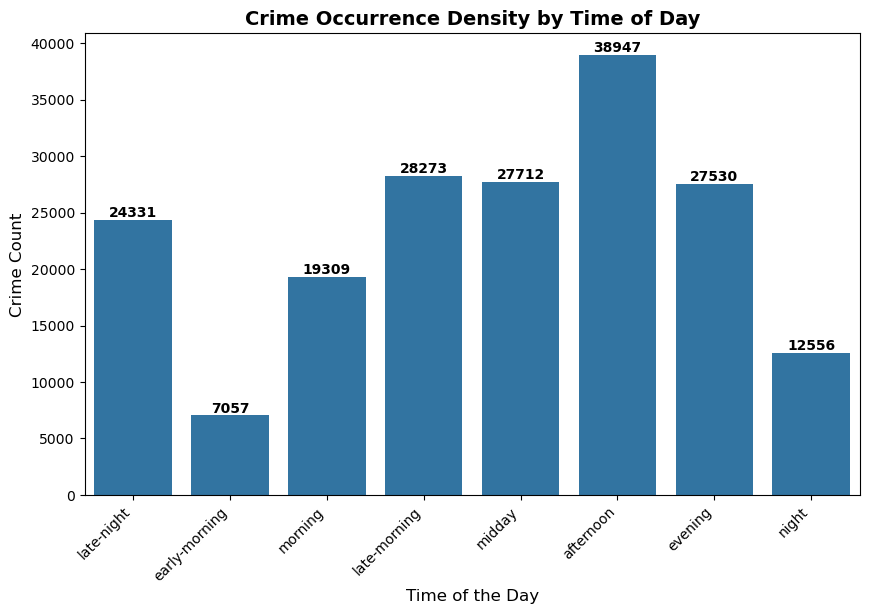

In [25]:
# Set figure size for better visibility
plt.figure(figsize=(10, 6))

# Improved count plot with better styling
ax = sns.countplot(data=df, x='day_time')

# Formatting
plt.title("Crime Occurrence Density by Time of Day", fontsize=14, fontweight='bold')
plt.xlabel("Time of the Day", fontsize=12)
plt.ylabel("Crime Count", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Remove grid for a cleaner look
ax.grid(False)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')


plt.savefig('./figures/f4_crimes_by_time_of_the_day.png')
plt.show()

### Top 15 Most Frequent Crimes in LA

This analysis focuses on the most frequently occurring crimes in the dataset, highlighting the top 15 criminal codes based on their frequency. The plot displays the count of each crime, alongside the percentage of the total for each. By showing both the absolute numbers and their relative frequencies, this visualisation provides a clear picture of which crimes are most prevalent in the data.

The results help identify the most common crime types, offering valuable insights for law enforcement and policy-making. Understanding the distribution of crime types can assist in focusing efforts on addressing the most frequent offences and allocating resources where they are most needed.


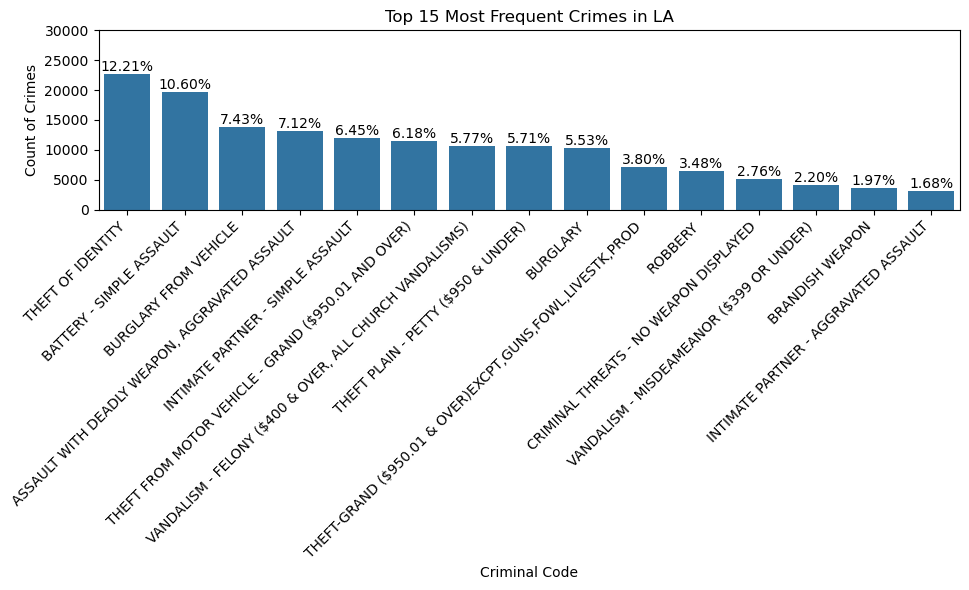

In [26]:
total_list=len(df)

# Get the top 15 values and sort them in descending order
top_15_values = df['Crm Cd Desc'].value_counts().head(15)

# Calculate the percentage
percentage = (top_15_values / total_list) * 100

# Create a count plot with percentages
plt.figure(figsize=(10, 6))
sns.countplot(x='Crm Cd Desc', data=df[df['Crm Cd Desc'].isin(top_15_values.index)],
              order=top_15_values.index)

# Display percentage on top of each bar
for p in plt.gca().patches:
    height = p.get_height()
    percentage_text = f'{(height / len(df) * 100):.2f}%'  # Calculate percentage
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.5, percentage_text,
                   ha='center', va='bottom', fontsize=10)

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the title and labels
plt.title('Top 15 Most Frequent Crimes in LA')
plt.xlabel('Criminal Code')
plt.ylabel('Count of Crimes')
plt.ylim(0,30000)

# Show the plot
plt.tight_layout()
plt.savefig('./figures/f5_15_freq_crimes.png')
plt.show()

### Top 15 Most Frequent Violent Crimes in LA

This analysis highlights the most common violent crimes in the dataset by identifying the top 15 criminal codes associated with violent offences. By focusing specifically on violent crimes, the visualisation reveals which types of violent crimes are most prevalent, providing a clearer understanding of where law enforcement efforts may need to be concentrated.

The plot displays the frequency of these crimes along with their respective percentages of the total crime count, helping to contextualise the scale of each offence within the broader dataset. This information is crucial for shaping policies and interventions aimed at reducing violent crime in specific areas or times.


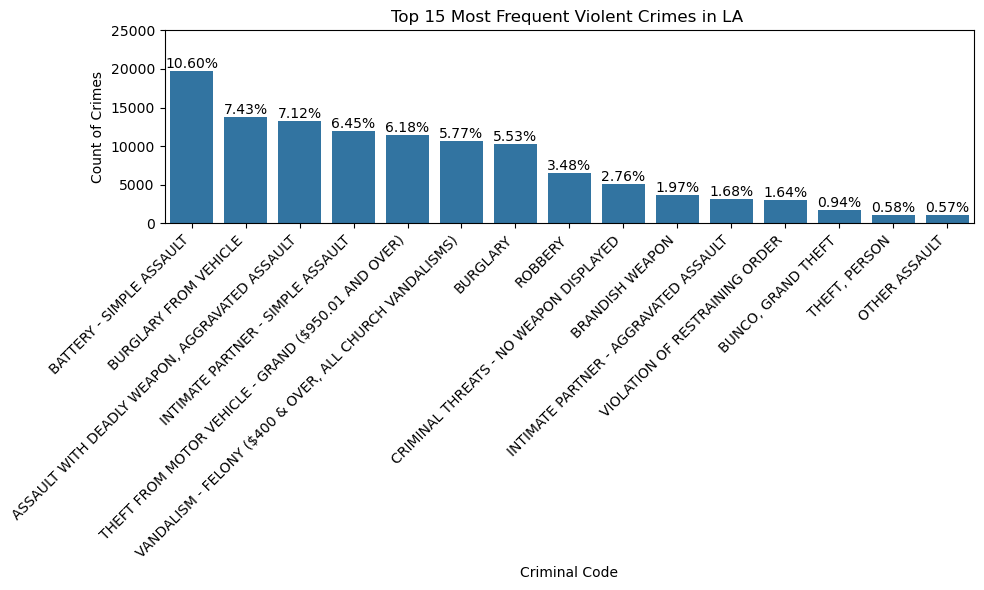

In [27]:
# List of Violent Crimes
violent_crimes = [
    'BURGLARY', 
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)', 
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
    'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', 
    'ORAL COPULATION',
    'BUNCO, GRAND THEFT', 
    'INTIMATE PARTNER - SIMPLE ASSAULT',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)', 
    'VIOLATION OF RESTRAINING ORDER', 
    'BURGLARY FROM VEHICLE',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT',
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
    'BATTERY - SIMPLE ASSAULT',
    'DISTURBING THE PEACE',
    'EXTORTION',
    'CRIMINAL THREATS - NO WEAPON DISPLAYED',
    'ROBBERY',
    'STALKING',
    'BRANDISH WEAPON',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
    'KIDNAPPING',
    'CRIMINAL HOMICIDE',
    'THEFT, PERSON',
    'OTHER ASSAULT',
    'ARSON',
    'FALSE IMPRISONMENT',
    'SHOTS FIRED AT INHABITED DWELLING',
    'BATTERY POLICE (SIMPLE)',
    'DISCHARGE FIREARMS/SHOTS FIRED',
    'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
    'THROWING OBJECT AT MOVING VEHICLE',
    'PROWLER',
    'BATTERY ON A FIREFIGHTER',
    'KIDNAPPING - GRAND ATTEMPT',
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
    'PURSE SNATCHING',
    'RESISTING ARREST',
    'ASSAULT WITH DEADLY WEAPON',
    'BOMB SCARE',
    'CRUELTY TO ANIMALS',
    'PANDERING',
    'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)',
    'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)',
    'BRIBERY',
    'LYNCHING'
]
df['violent'] = df['Crm Cd Desc'].isin(violent_crimes) # Violent Crimes flag

# Get the top 15 values and sort them in descending order
top_15_violent_crimes = df[df['Crm Cd Desc'].isin(violent_crimes)]['Crm Cd Desc'].value_counts().head(15)

# Calculate the percentage
percentage = (top_15_violent_crimes / total_list) * 100

# Create a count plot with percentages
plt.figure(figsize=(10, 6))
sns.countplot(x='Crm Cd Desc', data=df[df['Crm Cd Desc'].isin(top_15_violent_crimes.index)],
              order=top_15_violent_crimes.index)

# Display percentage on top of each bar
for p in plt.gca().patches:
    height = p.get_height()
    percentage_text = f'{(height / len(df) * 100):.2f}%'  # Calculate percentage
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.5, percentage_text,
                   ha='center', va='bottom', fontsize=10)

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the title and labels
plt.title('Top 15 Most Frequent Violent Crimes in LA ')
plt.xlabel('Criminal Code')
plt.ylabel('Count of Crimes')
plt.ylim(0,25000)

# Show the plot
plt.tight_layout()
plt.savefig('./figures/f6_15_freq_violent_crimes.png')
plt.show()

### Top 5 Areas with the Most Violent Crimes

This analysis identifies the five areas with the highest incidence of violent crimes. By filtering the dataset for violent crimes, the plot highlights which locations experience the greatest concentration of such offences. The bar plot clearly displays the number of violent crimes in these areas, providing valuable insights for targeted crime prevention strategies and resource allocation.


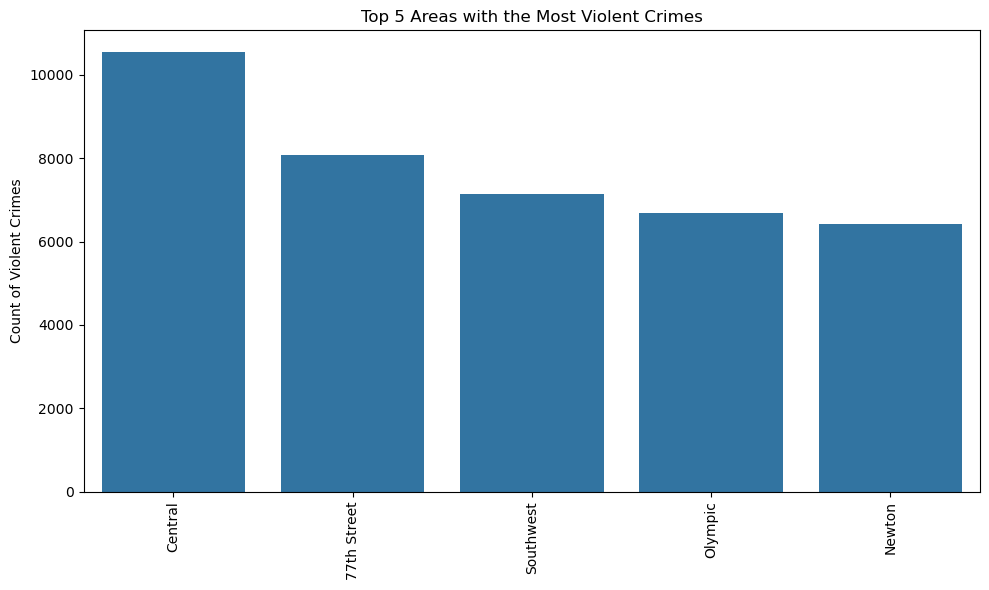

In [28]:
# Filter the dataset for violent crimes
violent_crimes_data = df[df['violent']]

# Get the top 10 locations with the most violent crimes
top_5_locations = violent_crimes_data['AREA NAME'].value_counts().head(5)

# Create a bar plot of the top 10 locations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_locations.index, y=top_5_locations.values)

# Formatting
plt.title('Top 5 Areas with the Most Violent Crimes')
plt.xlabel('')
plt.ylabel('Count of Violent Crimes')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.savefig('./figures/f7_5_areas_violent_crimes.png')
plt.show()

## Saving Processed Data

This step saves the cleaned and processed dataset to a CSV file named 'crimes_processed.csv' in the designated interim data directory. The resulting file can then be used for further analysis or reporting.


In [29]:
processed_file = os.path.join(INTERIM_DATA_DIR, 'crimes_processed.csv')
df.to_csv(processed_file)